# Worksheet 16

Name: **Bowen Li**  
UID: **U79057147** 

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [2]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

In [7]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .01
expanding_rate = .99
retracting_rate = 1.1

#X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
labels = np.array([1, 0, 0, 1])

Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))



alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    kernels = np.array([polynomial(X[j], x, 5, 4) for j in range(X.shape[0])])
    return alpha_i.T @ kernels + b

images = []
for epoch in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    y_pred = predict(alpha_i, b, x)
    if y_pred * y > 0:
        if -1 < y_pred < 1:
            alpha_i[i] += y * learning_rate
            alpha_i *= retracting_rate
            b += y * learning_rate * retracting_rate
        else:
            alpha_i *= expanding_rate
            b *= expanding_rate
    else:
        error = True
        alpha_i[i] += y * learning_rate
        alpha_i *= expanding_rate
        b += y * learning_rate * expanding_rate
        
    images.append(snap(x, alpha_i, b, error))
    ''' TESTING CODE
    num_correct = 0
    for j in range(len(X)):
        x_test, y_test = X[j], Y[j]
        y_test_pred = predict(alpha_i, b, x_test)
        if y_test_pred * y_test > 0:
            num_correct += 1
    acc = num_correct / len(X)
    print(f"EPOCH: {epoch+1}\t Acc: {acc}")
    '''


images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Decrease `n` to reduce model complexity and potentially reduce overfitting.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

Decreasing `sigma` gives each point more influence in its local neighborhood which can increase model complexity to prevent underfitting.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

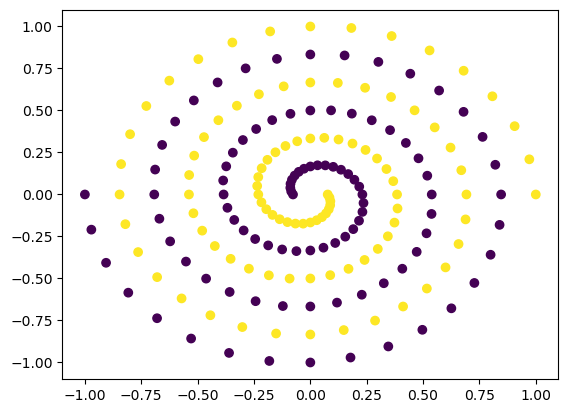

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
X, Y = data[:, :2], data[:, 2]

plt.scatter(X[:,0], X[:,1], c=Y)

In [24]:
def rbf(x_i, x_j, sigma):
    diff = x_i - x_j
    return np.exp(-diff.T @ diff / (2*sigma*sigma))

In [33]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets


epochs = 1000
learning_rate = .01
expanding_rate = .995
retracting_rate = 1.01

labels = (Y == 1).astype(int)

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .1  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    kernels = np.array([rbf(X[j], x, 0.05) for j in range(X.shape[0])])
    return alpha_i.T @ kernels + b

images = []
for epoch in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    y_pred = predict(alpha_i, b, x)
    if y_pred * y > 0:
        if -1 < y_pred < 1:
            alpha_i[i] += y * learning_rate
            alpha_i *= retracting_rate
            b += y * learning_rate * retracting_rate
        else:
            alpha_i *= expanding_rate
            b *= expanding_rate
    else:
        error = True
        alpha_i[i] += y * learning_rate
        alpha_i *= expanding_rate
        b += y * learning_rate * expanding_rate
        
    if (epoch + 1) % 10 == 0:
        images.append(snap(x, alpha_i, b, error))
        num_correct = 0
        for j in range(len(X)):
            x_test, y_test = X[j], Y[j]
            y_test_pred = predict(alpha_i, b, x_test)
            if y_test_pred * y_test > 0:
                num_correct += 1
        acc = num_correct / len(X)
        print(f"EPOCH: {epoch+1}\t Acc: {acc}")


images[0].save(
    'svm_spiral.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


EPOCH: 10	 Acc: 0.6082474226804123
EPOCH: 20	 Acc: 0.5
EPOCH: 30	 Acc: 0.5
EPOCH: 40	 Acc: 0.5
EPOCH: 50	 Acc: 0.5
EPOCH: 60	 Acc: 0.5
EPOCH: 70	 Acc: 0.5
EPOCH: 80	 Acc: 0.5
EPOCH: 90	 Acc: 0.5
EPOCH: 100	 Acc: 0.5
EPOCH: 110	 Acc: 0.5
EPOCH: 120	 Acc: 0.5
EPOCH: 130	 Acc: 0.5
EPOCH: 140	 Acc: 0.5
EPOCH: 150	 Acc: 0.5
EPOCH: 160	 Acc: 0.5
EPOCH: 170	 Acc: 0.5
EPOCH: 180	 Acc: 0.5
EPOCH: 190	 Acc: 0.5
EPOCH: 200	 Acc: 0.5
EPOCH: 210	 Acc: 0.5
EPOCH: 220	 Acc: 0.5
EPOCH: 230	 Acc: 0.5
EPOCH: 240	 Acc: 0.5
EPOCH: 250	 Acc: 0.5
EPOCH: 260	 Acc: 0.5
EPOCH: 270	 Acc: 0.5
EPOCH: 280	 Acc: 0.5
EPOCH: 290	 Acc: 0.5
EPOCH: 300	 Acc: 0.5
EPOCH: 310	 Acc: 0.5
EPOCH: 320	 Acc: 0.5
EPOCH: 330	 Acc: 0.5
EPOCH: 340	 Acc: 0.5
EPOCH: 350	 Acc: 0.5
EPOCH: 360	 Acc: 0.5
EPOCH: 370	 Acc: 0.5
EPOCH: 380	 Acc: 0.5
EPOCH: 390	 Acc: 0.5
EPOCH: 400	 Acc: 0.5
EPOCH: 410	 Acc: 0.5
EPOCH: 420	 Acc: 0.5154639175257731
EPOCH: 430	 Acc: 0.5
EPOCH: 440	 Acc: 0.5
EPOCH: 450	 Acc: 0.5
EPOCH: 460	 Acc: 0.5
EPOCH: 470	 A